# Preliminary Analysis 

In [ ]:
import pandas as pd 
import numpy as np   
import pkg_resources
pkg_resources.require("pyarrow>=2.0.0")
import pyspark as spark
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr   

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff
import seaborn as sns    
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('Display.max_rows',None)
pd.set_option('Display.max_columns',None)
pd.set_option('display.width', 1000)

## Reading in data

In [ ]:
df = pd.read_table('/Users/andrewmelendez/Desktop/pitches_folder/pitches', sep = ',')
df.info()

## Identifying the shape of the data

In [216]:
df.shape

(718961, 125)

In [268]:
# Data Types
for dtype, col in enumerate(df.columns):
    print(col, ":", df.dtypes[dtype])

uid : int64
game_pk : int64
year : int64
date : object
team_id_b : int64
team_id_p : int64
inning : int64
top : int64
at_bat_num : int64
pcount_at_bat : int64
pcount_pitcher : int64
balls : int64
strikes : int64
fouls : int64
outs : int64
is_final_pitch : int64
final_balls : int64
final_strikes : int64
final_outs : int64
start_tfs : int64
start_tfs_zulu : object
batter_id : int64
stand : object
b_height : object
pitcher_id : int64
p_throws : object
at_bat_des : object
event : object
event2 : object
event3 : object
event4 : object
away_team_runs : int64
home_team_runs : int64
score : object
pitch_des : object
pitch_id : int64
type : object
pitch_tfs : float64
pitch_tfs_zulu : object
x : float64
y : float64
sv_id : object
start_speed : float64
end_speed : float64
sz_top : float64
sz_bot : float64
pfx_x : float64
pfx_z : float64
px : float64
pz : float64
x0 : float64
z0 : float64
y0 : float64
vx0 : float64
vz0 : float64
vy0 : float64
ax : float64
az : float64
ay : float64
break_length : f

In [217]:
df.head()

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,is_final_pitch,final_balls,final_strikes,final_outs,start_tfs,start_tfs_zulu,batter_id,stand,b_height,pitcher_id,p_throws,at_bat_des,event,event2,event3,event4,away_team_runs,home_team_runs,score,pitch_des,pitch_id,type,pitch_tfs,pitch_tfs_zulu,x,y,sv_id,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,px,pz,x0,z0,y0,vx0,vz0,vy0,ax,az,ay,break_length,break_y,break_angle,pitch_type,type_confidence,zone,nasty,spin_dir,spin_rate,cc,on_1b,on_2b,on_3b,runner1_id,runner1_start,runner1_end,runner1_event,runner1_score,runner1_rbi,runner1_earned,runner2_id,runner2_start,runner2_end,runner2_event,runner2_score,runner2_rbi,runner2_earned,runner3_id,runner3_start,runner3_end,runner3_event,runner3_score,runner3_rbi,runner3_earned,runner4_id,runner4_start,runner4_end,runner4_event,runner4_score,runner4_rbi,runner4_earned,runner5_id,runner5_start,runner5_end,runner5_event,runner5_score,runner5_rbi,runner5_earned,runner6_id,runner6_start,runner6_end,runner6_event,runner6_score,runner6_rbi,runner6_earned,runner7_id,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,created_at,added_at,modified_at,modified_by
0,14143226,286874,2011,2011-03-31,108,118,1,1,1,1,1,0,0,0,0,0,2,1,1,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,"Maicer Izturis grounds out, second baseman Chr...",Groundout,NaN,NaN,NaN,0,0,NaN,Ball,3,B,201301.0,2011-03-31 20:13:01,105.58,180.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
1,14143227,286874,2011,2011-03-31,108,118,1,1,1,2,2,1,0,0,0,0,2,1,1,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,"Maicer Izturis grounds out, second baseman Chr...",Groundout,NaN,NaN,NaN,0,0,NaN,Ball,4,B,201319.0,2011-03-31 20:13:19,99.57,170.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
2,14143228,286874,2011,2011-03-31,108,118,1,1,1,3,3,2,0,0,0,0,2,1,1,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,"Maicer Izturis grounds out, second baseman Chr...",Groundout,NaN,NaN,NaN,0,0,NaN,Called Strike,5,S,201327.0,2011-03-31 20:13:27,95.28,152.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
3,14143229,286874,2011,2011-03-31,108,118,1,1,1,4,4,2,1,0,0,1,2,1,1,201226,2011-03-31 20:12:26,430895,L,5-8,460024,R,"Maicer Izturis grounds out, second baseman Chr...",Groundout,NaN,NaN,NaN,0,0,NaN,"In play, out(s)",6,X,180441.0,2011-03-31 18:04:41,93.56,168.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
4,14143230,286874,2011,2011-03-31,108,118,1,1,2,1,5,0,0,0,1,0,2,2,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,R,Howie Kendrick doubles (1) on a line drive to ...,Double,NaN,NaN,NaN,0,0,N

In [218]:
df.tail()

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,is_final_pitch,final_balls,final_strikes,final_outs,start_tfs,start_tfs_zulu,batter_id,stand,b_height,pitcher_id,p_throws,at_bat_des,event,event2,event3,event4,away_team_runs,home_team_runs,score,pitch_des,pitch_id,type,pitch_tfs,pitch_tfs_zulu,x,y,sv_id,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,px,pz,x0,z0,y0,vx0,vz0,vy0,ax,az,ay,break_length,break_y,break_angle,pitch_type,type_confidence,zone,nasty,spin_dir,spin_rate,cc,on_1b,on_2b,on_3b,runner1_id,runner1_start,runner1_end,runner1_event,runner1_score,runner1_rbi,runner1_earned,runner2_id,runner2_start,runner2_end,runner2_event,runner2_score,runner2_rbi,runner2_earned,runner3_id,runner3_start,runner3_end,runner3_event,runner3_score,runner3_rbi,runner3_earned,runner4_id,runner4_start,runner4_end,runner4_event,runner4_score,runner4_rbi,runner4_earned,runner5_id,runner5_start,runner5_end,runner5_event,runner5_score,runner5_rbi,runner5_earned,runner6_id,runner6_start,runner6_end,runner6_event,runner6_score,runner6_rbi,runner6_earned,runner7_id,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,created_at,added_at,modified_at,modified_by
718956,19838192,317073,2011,2011-10-28,140,138,9,1,72,3,7,1,1,0,1,0,2,2,2,31934,2011-10-29 03:19:34,435063,R,6-0,435400,R,"Mike Napoli grounds out, third baseman Daniel ...",Groundout,NaN,NaN,NaN,2,6,NaN,Foul,614,S,32000.0,2011-10-29 03:20:00,102.15,140.74,111028_221959,97.9,89.1,3.14,1.50,-3.35,10.56,-0.069,2.689,-0.899,5.513,50.0,3.560,-6.112,-143.374,-6.886,-10.386,36.837,2.6,23.7,26.6,FF,2.0,2.0,29.0,197.537,2312.186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 22:23:19,2016-03-03 22:23:19,2016-03-03 22:23:19,1
718957,19838193,317073,2011,2011-10-28,140,138,9,1,72,4,8,1,2,1,1,0,2,2,2,31934,2011-10-29 03:19:34,435063,R,6-0,435400,R,"Mike Napoli grounds out, third baseman Daniel ...",Groundout,NaN,NaN,NaN,2,6,NaN,Ball,615,B,32030.0,2011-10-29 03:20:30,90.99,170.10,111028_222029,91.4,84.3,3.14,1.43,0.94,3.39,0.275,1.446,-0.863,5.415,50.0,2.680,-5.564,-133.947,1.707,-25.962,29.860,6.1,23.8,-4.7,FC,2.0,9.0,47.0,164.636,697.763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 22:23:19,2016-03-03 22:23:19,2016-03-03 22:23:19,1
718958,19838194,317073,2011,2011-10-28,140,138,9,1,72,5,9,2,2,1,1,1,2,2,2,31934,2011-10-29 03:19:34,435063,R,6-0,435400,R,"Mike Napoli grounds out, third baseman Daniel ...",Groundout,NaN,NaN,NaN,2,6,NaN,"In play, out(s)",616,X,223106.0,2011-10-28 22:31:06,109.01,155.42,111028_222049,97.3,88.0,3.14,1.50,-4.43,9.53,-0.261,2.122,-0.774,5.554,50.0,3.031,-7.265,-142.543,-8.925,-12.891,38.935,3.4,23.7,28.7,FF,2.0,4.0,29.0,204.835,2162.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 22:23:19,2016-03-03 22:23:19,2016-03-03 22:23:19,1
718959,19838195,317073,2011,2011-10-28,140,138,9,1,73,1,10,0,0,0,2,0,0,1,3,32141,2011-10-29 03:21:41,461815,L,6-3,435400,R,David Murphy flies out to left fielder Allen C...,Flyout,NaN,NaN,NaN,2,6,NaN,Called Strike,620,S,32140.0,2011-10-29 03:21:40,105.58,158.01,111028_222139,93.1,85.3,3.74,1.76,-10.53,3.05,-0.136,2.053,-0.989,5.394,50.0,5.952,-4.042,-136.340,-19.664,-26.404,32.209,7.2,23.8,33.8,FT,2.0,8.0,44.0,253.646,2180.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [294]:
# Number of unique values
df.nunique()

uid                718961
game_pk              2467
year                    1
date                  203
team_id_b              30
team_id_p              30
inning                 19
top                     2
at_bat_num            158
pcount_at_bat          16
pcount_pitcher        133
balls                   5
strikes                 3
fouls                  13
outs                    3
is_final_pitch          2
final_balls             5
final_strikes           4
final_outs              4
start_tfs           42550
start_tfs_zulu     184905
batter_id             936
stand                   2
b_height               18
pitcher_id            662
p_throws                2
at_bat_des         129102
event                  30
event2                 14
event3                  5
event4                  1
away_team_runs         20
home_team_runs         23
score                   1
pitch_des              18
pitch_id             1237
type                    3
pitch_tfs           48390
pitch_tfs_zu

## Data Processing (Identifying missing & irrelevant data)

Text(0.5, 1.0, 'Missing Values')

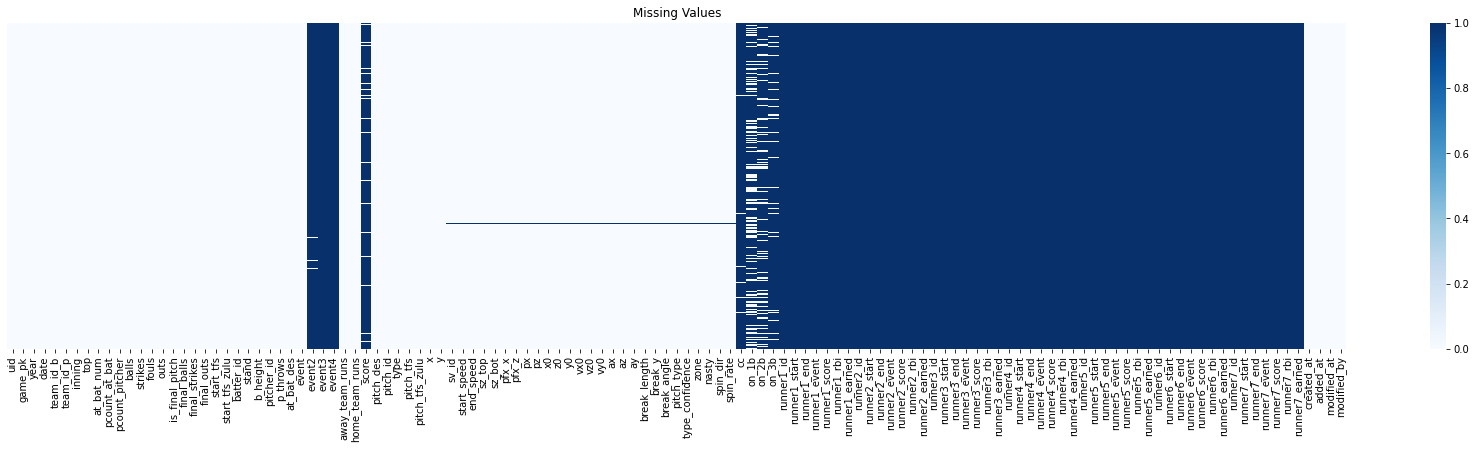

In [219]:
# Generating a visual plot to display missing value percentage in our dataset (range = 0:1)

matplotlib.rcParams['figure.figsize'] = (30,6)
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'Blues')
plt.title('Missing Values')

## Takeaways: <br>
1. From the visual above we can immediately derive a sense there is a portion of the data with 100% NaN values.
2. Accoring to the metadata, there is no significance in NaN. Thus, we can simply dissinclude these columns from our analysis.

In [289]:
# We can create our own function to drop columns with 100% missing data but python has a pre built function to take care of this for us
# using the dropna we set 'how' = 'all' and 'axis' = 1, allowing us to only dropping only columns that are missing 100% of data

df_non_null = df.dropna(how='all', axis=1)

# We are going to create a for loop to kick back any columns with 100% missing data. This is to check if our function above worked properly (Goal = result is an empty list)

def null_check(df):
    cols = []
    for i in range(len(df.columns)):
        if df[df.columns[i]].isnull().sum() / df.shape[0] == 1.0:
            print(cols.append(df.columns[i]))
        else:
            continue
    return cols              

null_check(df_non_null)

[]

In [290]:
df_non_null.shape

(718961, 76)

## Currently we have identified 49 irrelevant columns (due to missing data). <br> <br> Keeping the ultimate goal in mind, we are now going to parse any data that does not add any true value but retain information that may be useful insight when beginning the model building process.

In [291]:
# List of columns we are getting rid of
drop_data = ['uid', 'year', 'final_outs', 'start_tfs', 'start_tfs_zulu', 'at_bat_des', 'event2', 'event3', 'event4', 
                    'pitch_des', 'type', 'pitch_tfs', 'pitch_tfs_zulu', 'x', 'y', 'sv_id', 'px', 'pz', 
                    'x0', 'z0', 'y0','vx0', 'vz0', 'vy0', 'ax', 'az', 'ay', 'break_y', 'type_confidence', 'zone', 'nasty',
                    'cc', 'created_at', 'added_at', 'modified_at', 'modified_by']

# Dropping columns based off list 
df_non_null.drop(columns=drop_data, inplace=True)
df_non_null.head()

,game_pk,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,is_final_pitch,final_balls,final_strikes,batter_id,stand,b_height,pitcher_id,p_throws,event,away_team_runs,home_team_runs,score,pitch_id,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,break_length,break_angle,pitch_type,spin_dir,spin_rate,on_1b,on_2b,on_3b
0,286874,2011-03-31,108,118,1,1,1,1,1,0,0,0,0,0,2,1,430895,L,5-8,460024,R,Groundout,0,0,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,286874,2011-03-31,108,118,1,1,1,2,2,1,0,0,0,0,2,1,430895,L,5-8,460024,R,Groundout,0,0,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,286874,2011-03-31,108,118,1,1,1,3,3,2,0,0,0,0,2,1,430895,L,5-8,460024,R,Groundout,0,0,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,286874,2011-03-31,108,118,1,1,1,4,4,2,1,0,0,1,2,1,430895,L,5-8,460024,R,Groundout,0,0,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,286874,2011-03-31,108,118,1,1,2,1,5,0,0,0,1,0,2,2,435062,R,5-10,460024,R,Double,0,0,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis 

In [300]:
df_non_null.describe()

,game_pk,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,is_final_pitch,final_balls,final_strikes,batter_id,pitcher_id,away_team_runs,home_team_runs,pitch_id,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,break_length,break_angle,spin_dir,spin_rate,on_1b,on_2b,on_3b
count,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,716681.000000,216323.000000,139703.000000,71635.000000
mean,288557.611823,128.787182,128.757296,5.033796,0.508900,39.301513,2.865276,37.357196,0.881476,0.857227,0.403211,0.975181,0.262365,1.853117,1.780479,402400.966934,417302.855035,2.295546,2.103648,312.074478,87.362028,80.612666,3.398461,1.600354,-0.863183,4.767071,6.755535,4.086515,180.497820,1701.832133,401914.883591,405057.467613,406976.610930
std,3642.210956,14.281039,14.306711,2.692326,0.499921,23.320725,1.715068,30.690569,0.964799,0.821435,0.788013,0.809470,0.439920,1.227970,0.929095,114259.843461,106722.375877,2.562901,2.452464,192.565092,6.153273,5.515286,0.206579,0.136247,6.322141,5.329747,2.975481,23.418248,68.470294,661.070516,114169.428675,112341.122268,110388.876227
min,286874.000000,108.000000,108.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110029.000000,110683.000000,0.000000,0.000000,3.000000,39.900000,38.000000,0.000000,0.000000,-21.640000,-26.190000,0.200000,-88.300000,-0.002000,0.741000,110029.000000,110029.000000,110029.000000
25%,287507.000000,115.000000,115.000000,3.000000,0.000000,19.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,408234.000000,425856.000000,0.000000,0.000000,149.000000,83.500000,77.300000,3.260000,1.510000,-6.160000,1.850000,4.500000,-12.500000,135.981000,1245.984000,408047.000000,408242.000000,408307.000000
50%,288129.000000,134.000000,134.000000,5.000000,1.000000,39.000000,3.000000,28.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,435263.000000,450308.000000,2.000000,1.000000,302.000000,88.800000,81.900000,3.400000,1.600000,-1.660000,5.810000,6.200000,5.600000,194.447000,1801.323000,435180.000000,435558.000000,440251.000000
75%,288749.000000,141.000000,141.000000,7.000000,1.000000,58.000000,4.000000,61.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,458679.000000,465629.000000,4.000000,3.000000,462.000000,92.000000,84.700000,3.540000,1.690000,4.170000,8.710000,8.200000,23.900000,226.155000,2181.165000,458675.000000,459434.000000,459941.000000
max,317073.000000,158.000000,158.000000,19.000000,1.000000,158.000000,16.000000,133.000000,4.000000,2.000000,12.000000,2.000000,1.000000,4.000000,3.000000,578428.000000,599899.000000,19.000000,22.000000,1330.000000,103.400000,95.900000,4.310000,3.150000,25.060000,23.470000,34.100000,269.200000,359.996000,5421.049000,578428.000000,578428.000000,578428.000000


array([[<AxesSubplot:title={'center':'game_pk'}>,
        <AxesSubplot:title={'center':'team_id_b'}>,
        <AxesSubplot:title={'center':'team_id_p'}>,
        <AxesSubplot:title={'center':'inning'}>,
        <AxesSubplot:title={'center':'top'}>,
        <AxesSubplot:title={'center':'at_bat_num'}>],
       [<AxesSubplot:title={'center':'pcount_at_bat'}>,
        <AxesSubplot:title={'center':'pcount_pitcher'}>,
        <AxesSubplot:title={'center':'balls'}>,
        <AxesSubplot:title={'center':'strikes'}>,
        <AxesSubplot:title={'center':'fouls'}>,
        <AxesSubplot:title={'center':'outs'}>],
       [<AxesSubplot:title={'center':'is_final_pitch'}>,
        <AxesSubplot:title={'center':'final_balls'}>,
        <AxesSubplot:title={'center':'final_strikes'}>,
        <AxesSubplot:title={'center':'batter_id'}>,
        <AxesSubplot:title={'center':'pitcher_id'}>,
        <AxesSubplot:title={'center':'away_team_runs'}>],
       [<AxesSubplot:title={'center':'home_team_runs'}>,
   

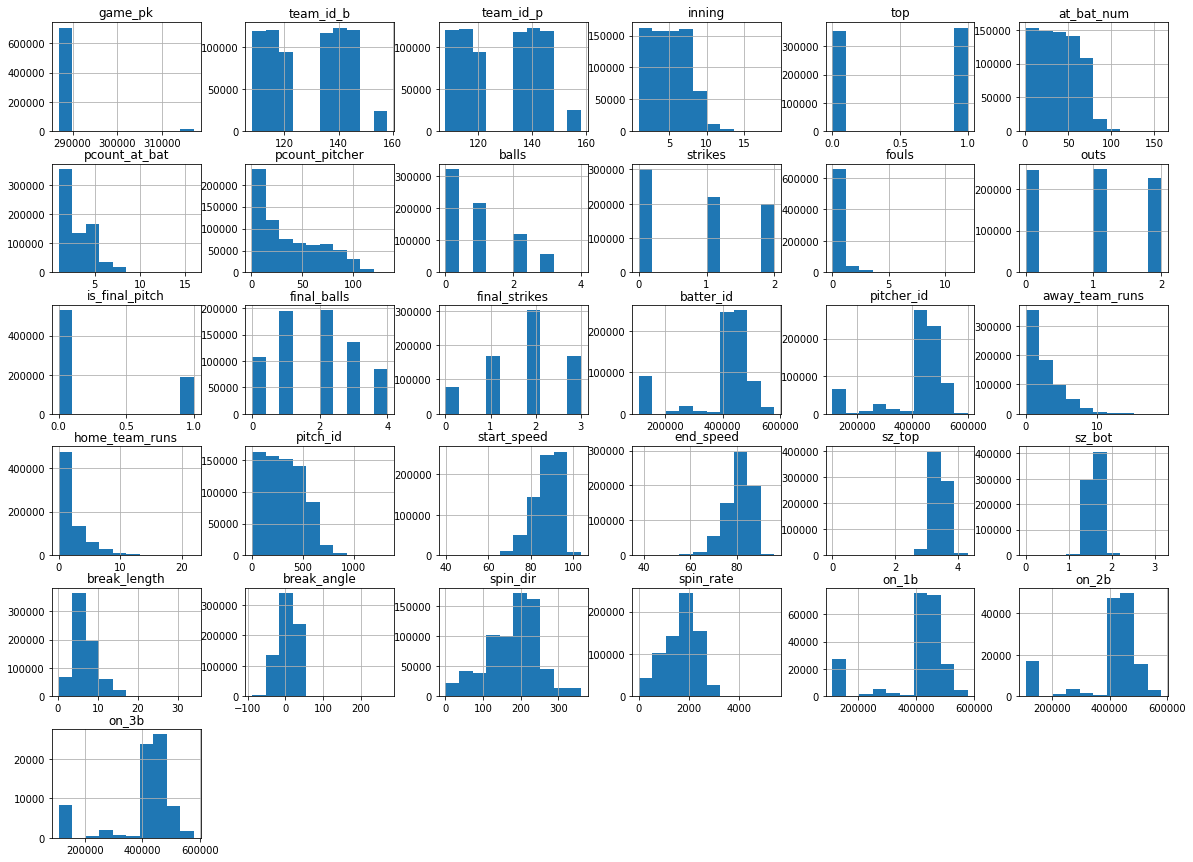

In [263]:
# Identifying distributions
df_non_null.hist(figsize=(20,15))

            pitch_type  pitch_proportion
0             Fastball            33.284
1               Slider            15.314
2               Sinker            12.243
3    Two-Seam Fastball            11.310
4             Changeup            10.136
5            Curveball             7.867
6               Cutter             5.819
7             Splitter             1.466
8        Knuckle-curve             1.185
9                Other             0.646
10         Knuckleball             0.621
11            Forkball             0.046
12  Four-Seam Fastball             0.028
13              Eephus             0.019
14           Screwball             0.017


[Text(0.5, 1.0, 'Proportion of pitches by type'), Text(0, 0.5, 'Proportion')]

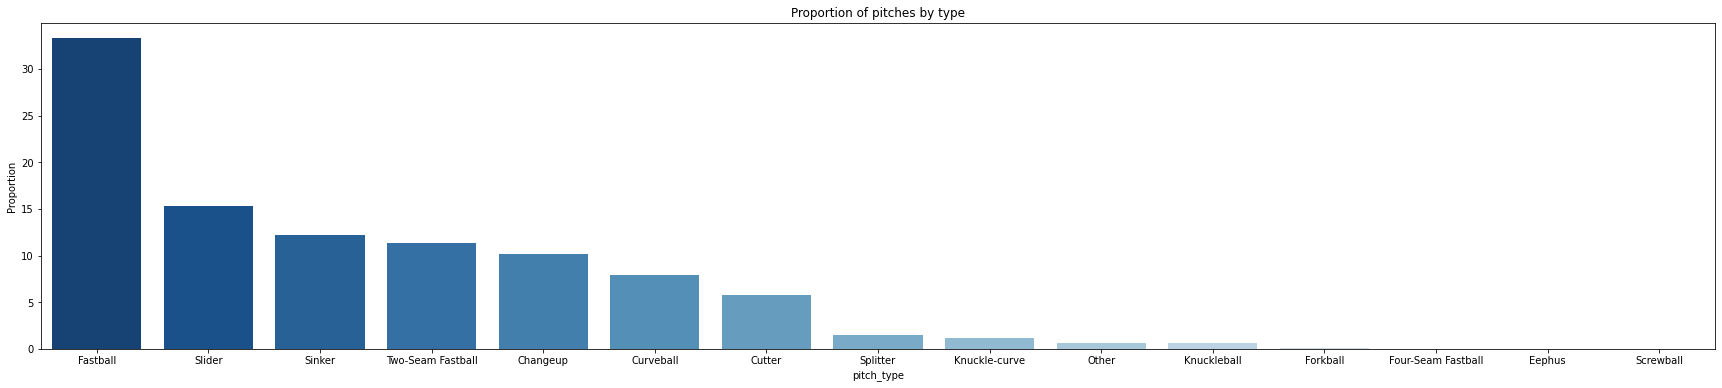

In [224]:
# Grouping data to get  count of each pitch type 

pitches_count = df_non_null.groupby('pitch_type').agg({'pitch_type':'count'})
pitches_count.rename(columns = {'pitch_type':'pitch_type_count'}, inplace = True)
pitches_count.reset_index(inplace = True)
pitches_count['pitch_proportion'] = round((pitches_count['pitch_type_count'] / pitches_count['pitch_type_count'].sum()) * 100,3)
pitches_count = pitches_count[['pitch_type', 'pitch_proportion']]

# Creating a dictionary to generate labels for abbreviated pitch types 
# Source : https://www.mlb.com/glossary/pitch-types

pitches_list = {'AB':'Other', 'CH':'Changeup', 'CU':'Curveball', 'EP':'Eephus', 'FA':'Four-Seam Fastball', 'FC':'Cutter', 'FF':'Fastball', 'FO':'Forkball', 'FS':'Splitter', 
              'FT':'Two-Seam Fastball', 'IN':'Other','KC':'Knuckle-curve', 'KN':'Knuckleball', 'PO':'Other', 'SC':'Screwball', 'SI':'Sinker', 'SL':'Slider', 'UN':'Other'}

# Generating a dataframe to represent the proportions of each pitch during the 2011 season
pitches_proportion = pitches_count.copy()
pitches_proportion['pitch_type'] = pitches_proportion['pitch_type'].map(pitches_list)
pitches_proportion = pd.DataFrame(pitches_proportion.groupby('pitch_type')['pitch_proportion'].sum().sort_values(ascending=False).reset_index())

# Printing raw data above visual (for reference)
print(pitches_proportion)
sns.barplot(x='pitch_type', y='pitch_proportion', data=pitches_proportion,
                 estimator=sum, ci=None, palette='Blues_r').set(title = 'Proportion of pitches by type', ylabel = 'Proportion')

### The proportions data and visual signified above are representative of the 'Fastball' holding the largest proportion in the 2011 season. We need to be careful of bias and look at other metrics besides accuracy, precision and recall during model development. 

             pitch_map   min       mean    max       std
0             Changeup  45.4  82.533012   94.1  3.320712
1            Curveball  51.9  76.352268   92.1  3.653091
2               Cutter  76.1  88.064122   98.6  3.031051
3               Eephus  54.2  62.797761   68.3  2.992132
4             Fastball  69.0  91.778039  103.4  2.819899
5             Forkball  70.2  78.234650   86.9  3.544983
6   Four-Seam Fastball  81.9  88.412745   97.0  2.142172
7        Knuckle-curve  64.4  78.800024   91.5  3.447421
8          Knuckleball  54.3  71.335011   83.0  5.787246
9                Other  39.9  71.951230   94.6  9.276189
10           Screwball  64.3  69.236667   81.6  3.831732
11              Sinker  71.6  90.472183  100.1  2.934696
12              Slider  54.9  83.381975   96.6  3.253526
13            Splitter  74.0  84.265962   92.1  2.684064
14   Two-Seam Fastball  75.5  91.174267  102.5  2.655681


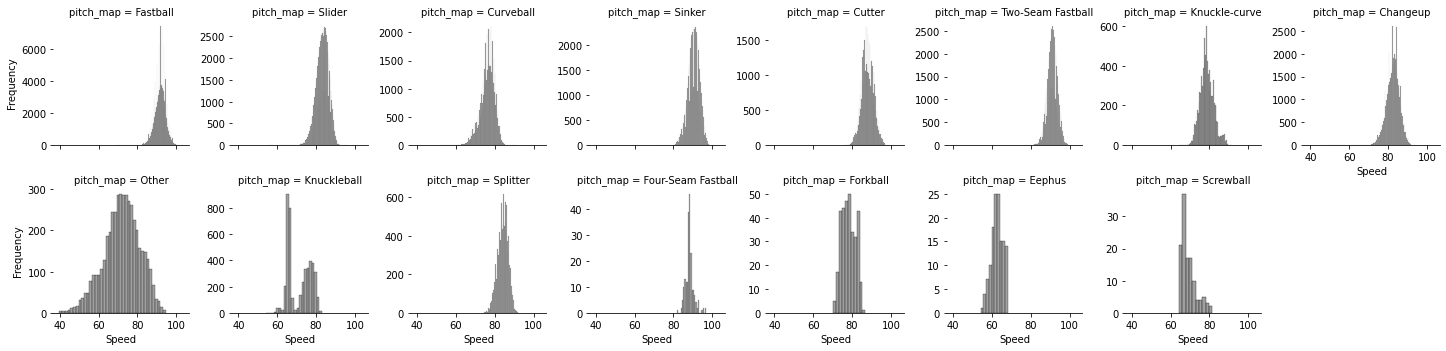

In [225]:
# Preparing data to identify the distribution of each pitch realtive to the speed
dist_pitch_by_speed = df_non_null.copy()
dist_pitch_by_speed['pitch_map'] = dist_pitch_by_speed['pitch_type'].map(pitches_list)
dist_pitch_by_speed = dist_pitch_by_speed[dist_pitch_by_speed['pitch_map'].notnull()]

# Table to support visuals
dist_pitch_by_speed_table = dist_pitch_by_speed.groupby('pitch_map')['start_speed'].agg(['min','mean','max','std']).reset_index()
print(dist_pitch_by_speed_table)

# Creating the graph for the distributions
dist_plot_pitch_by_speed = sns.FacetGrid(dist_pitch_by_speed, col="pitch_map", sharey = False, sharex = True, height=2.5, col_wrap=8)
dist_plot_pitch_by_speed.map(sns.histplot, "start_speed", color = 'Grey');
dist_plot_pitch_by_speed.set_axis_labels("Speed", "Frequency");
dist_plot_pitch_by_speed.despine(left=True)

### The graph above signifies that relative to each pitch type, there is a relatively low deviation (aside from the other category, which most likely is unknown) 

### Next we will group these pitch types to identify a simpler classifier

      pitch_type  pitch_proportion
0       Fastball            64.150
1  Breaking_Ball            24.383
2       Changeup            10.776
3          Other             0.692


[Text(0.5, 1.0, 'Proportion of pitches by group'),
 Text(0, 0.5, 'Proportion'),
 Text(0.5, 0, '')]

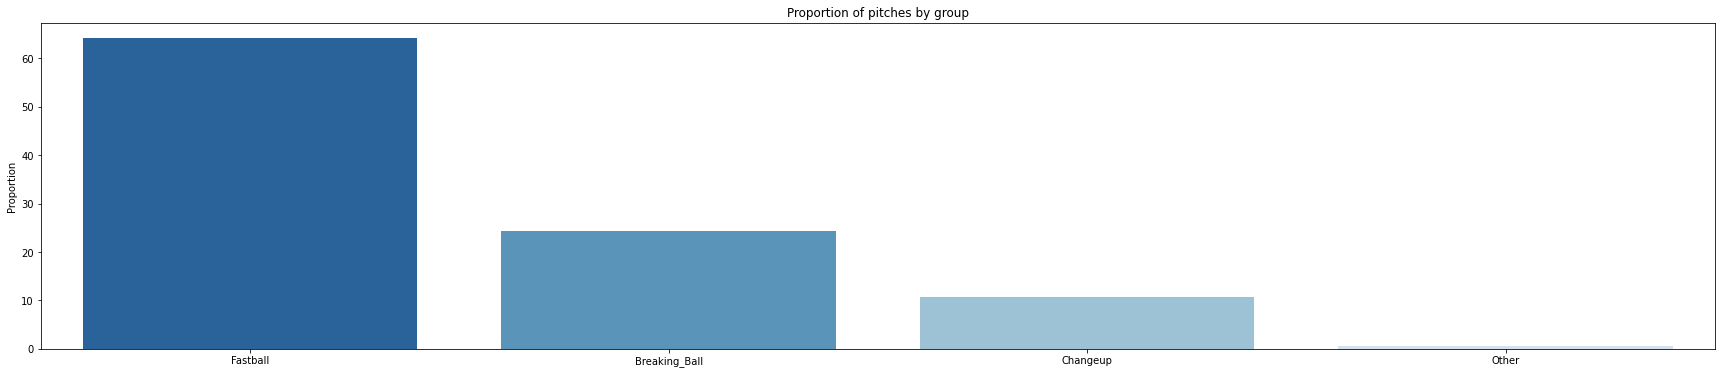

In [226]:
# Grouping list
grouped_pitches_list = {'AB':'Other', 'CH':'Changeup', 'CU':'Breaking_Ball', 'EP':'Changeup', 'FA':'Fastball', 'FC':'Fastball', 'FF':'Fastball', 'FO':'Other', 'FS':'Fastball', 
              'FT':'Fastball', 'IN':'Other','KC':'Breaking_Ball', 'KN':'Changeup', 'PO':'Other', 'SC':'Breaking_Ball', 'SI':'Fastball', 'SL':'Breaking_Ball', 'UN':'Other'}

grouped_pitches_proportion = pitches_count.copy()
grouped_pitches_proportion['pitch_type'] = grouped_pitches_proportion['pitch_type'].map(grouped_pitches_list)
grouped_pitches_proportion = pd.DataFrame(grouped_pitches_proportion.groupby('pitch_type')['pitch_proportion'].sum().sort_values(ascending=False).reset_index())


# Printing raw data above visual (for reference)
print(grouped_pitches_proportion)
sns.barplot(x='pitch_type', y='pitch_proportion', data=grouped_pitches_proportion, palette='Blues_r').set(title = 'Proportion of pitches by group', ylabel = 'Proportion', xlabel = '')

       pitch_map   min       mean    max       std
0  Breaking_Ball  51.9  80.881611   96.6  4.731891
1       Changeup  45.4  81.853496   94.1  4.444935
2       Fastball  69.0  90.912390  103.4  3.193508
3          Other  39.9  72.367593   94.6  9.144308


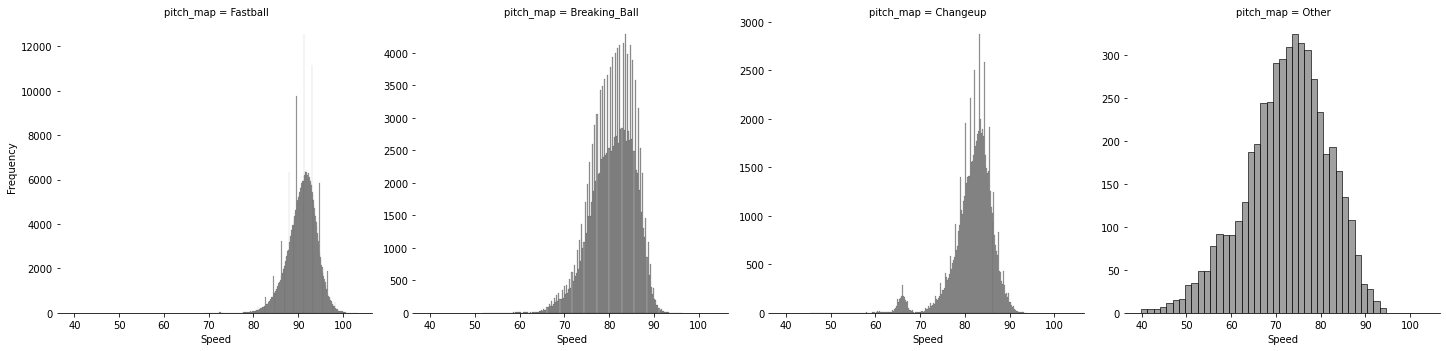

In [227]:
# Preparing grouped data to identify the distribution of each pitch realtive to the speed
dist_pitch_by_speed_grouped = df_non_null.copy()
dist_pitch_by_speed_grouped['pitch_map'] = dist_pitch_by_speed_grouped['pitch_type'].map(grouped_pitches_list)
dist_pitch_by_speed_grouped = dist_pitch_by_speed_grouped[dist_pitch_by_speed_grouped['pitch_map'].notnull()]

# Table to support visuals
dist_pitch_by_speed_grouped_table = dist_pitch_by_speed_grouped.groupby('pitch_map')['start_speed'].agg(['min','mean','max','std']).reset_index()
print(dist_pitch_by_speed_grouped_table)

# Creating the graph for the distributions
dist_plot_pitch_by_speed_grouped = sns.FacetGrid(dist_pitch_by_speed_grouped, col="pitch_map", sharey = False, sharex = True, height=5)
dist_plot_pitch_by_speed_grouped.map(sns.histplot, "start_speed", color = 'Grey');
dist_plot_pitch_by_speed_grouped.set_axis_labels("Speed", "Frequency");
dist_plot_pitch_by_speed_grouped.despine(left=True)

### Identify clusters based on Horizontal and Vertical of pitch

<AxesSubplot:xlabel='Horizontal_Movement', ylabel='Verttical_Movement'>

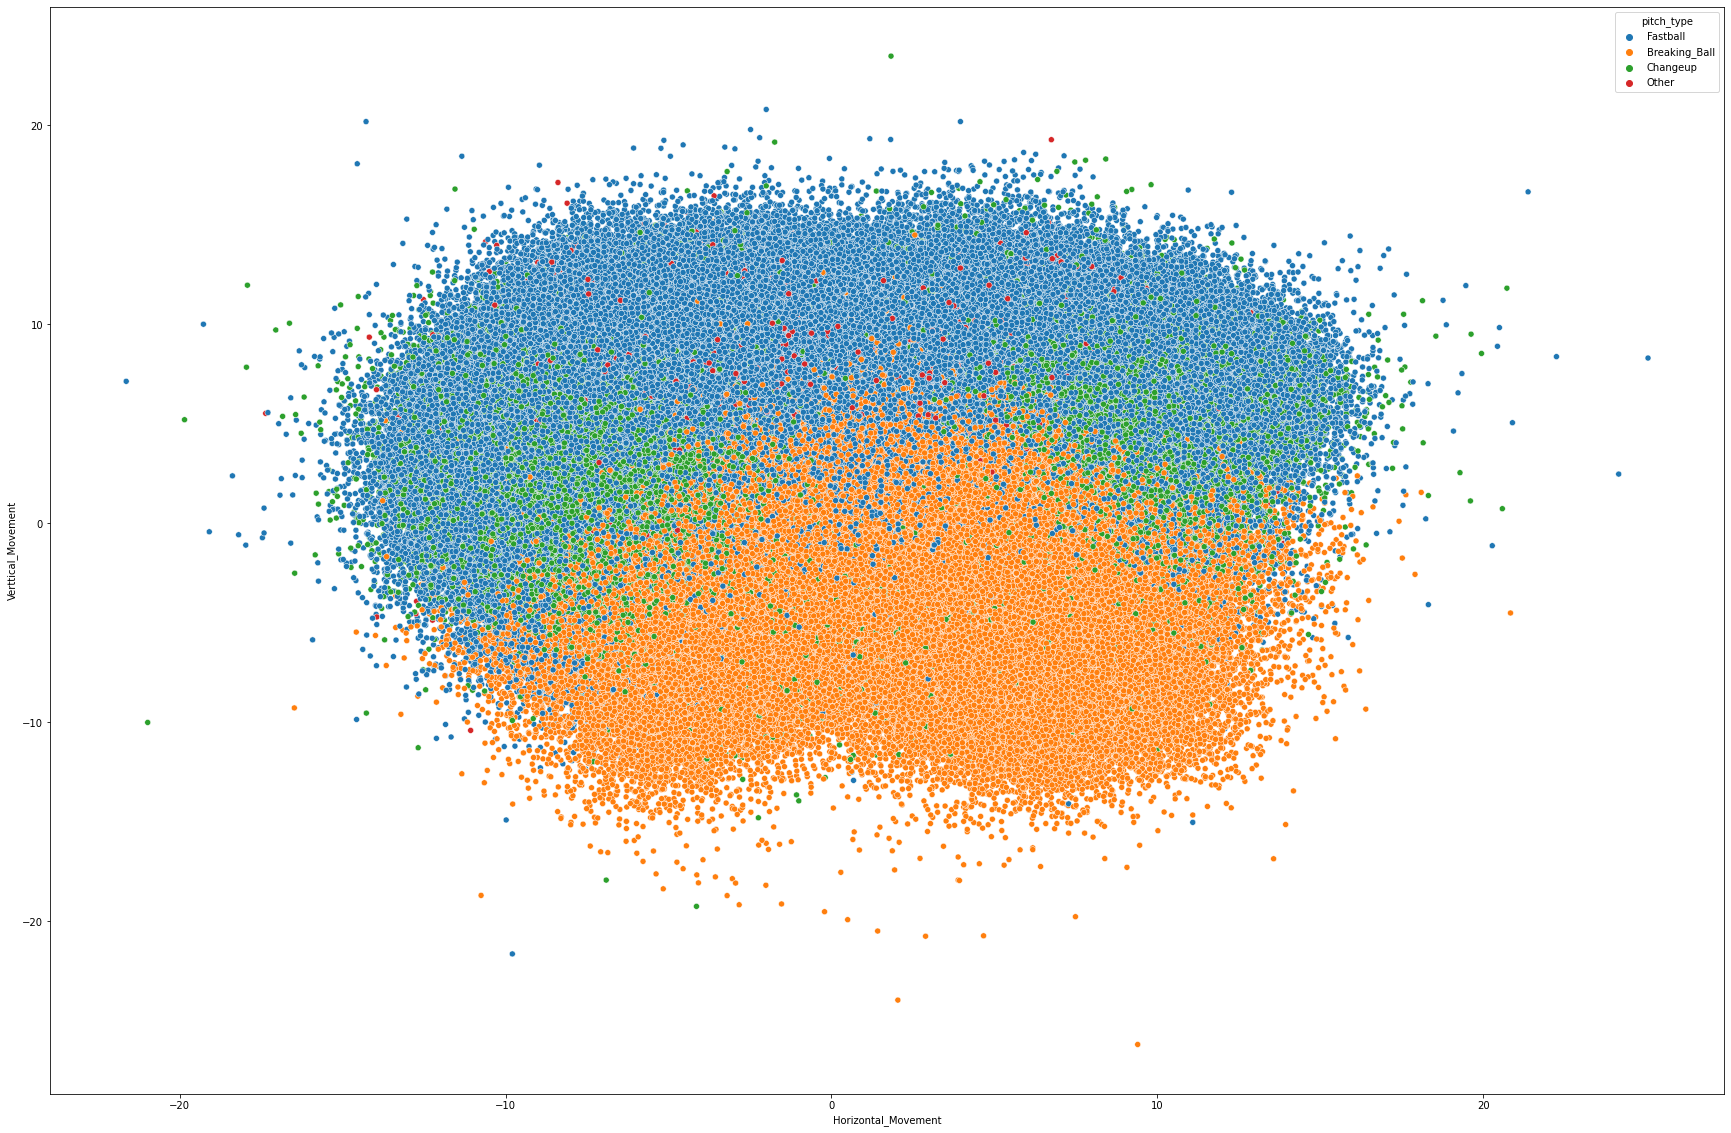

In [288]:
# Creating dataframe for visual
scatter_by_hor_vert_mov = df_non_null.copy()
scatter_by_hor_vert_mov = scatter_by_hor_vert_mov[['pitch_type', 'pfx_x', 'pfx_z']]
scatter_by_hor_vert_mov = scatter_by_hor_vert_mov.dropna(how='all', axis=0)

# Using grouped clusters as individual pitch types will be hard to identify
scatter_by_hor_vert_mov['pitch_type'] = scatter_by_hor_vert_mov['pitch_type'].map(grouped_pitches_list)
scatter_by_hor_vert_mov.rename(columns = {'pfx_x':'Horizontal_Movement', 'pfx_z':'Verttical_Movement'},inplace=True)

# plotting visual
f, ax = plt.subplots(figsize=(30, 20))
sns.scatterplot(data=scatter_by_hor_vert_mov, x="Horizontal_Movement", y="Verttical_Movement", ax=ax, hue="pitch_type")

### We are starting to identify that within these clusters, there are some signs of uniqueness in a pitches identity. <br> <br> *Note : End speed was utilized for the analysis above <br> <br> Takeaways: <br>
1. Fastballs seem to be driven on speed, they tailor a wider range of horizontal movements than vertical
2. Breaking Balls tend to play the middle group between fastballs and changeups. 
3. Other pitches seem to be random, given the column used 'pitch type' which is the end output of a classification algo, we may be identifying misclassified pitches.

### Now, lets identify if the ball-strike count shows anything interesting  

ball_strike_count      0-0      0-1      0-2      1-0      1-1      1-2      2-0      2-1      2-2     3-0     3-1      3-2  4-2
pitch_type                                                                                                                      
AB                     0.0      0.0      0.0      0.0      1.0      1.0      0.0      0.0      0.0     0.0     0.0      0.0  0.0
CH                 14429.0  10472.0   3499.0   9380.0  10249.0   6742.0   2181.0   4689.0   6599.0   189.0  1019.0   3193.0  0.0
CU                 14558.0   9614.0   5520.0   3243.0   6261.0   8226.0    440.0   1559.0   5305.0    22.0   231.0   1400.0  0.0
EP                    22.0     21.0     26.0      4.0     14.0     38.0      0.0      0.0      9.0     0.0     0.0      0.0  0.0
FA                    41.0     28.0     14.0     26.0     18.0     23.0     12.0     16.0     10.0     4.0     7.0      5.0  0.0
FC                 10177.0   5454.0   2537.0   4439.0   4608.0   3798.0   1440.0   2443.0   3457.

<AxesSubplot:xlabel='ball_strike_count', ylabel='pitch_type'>

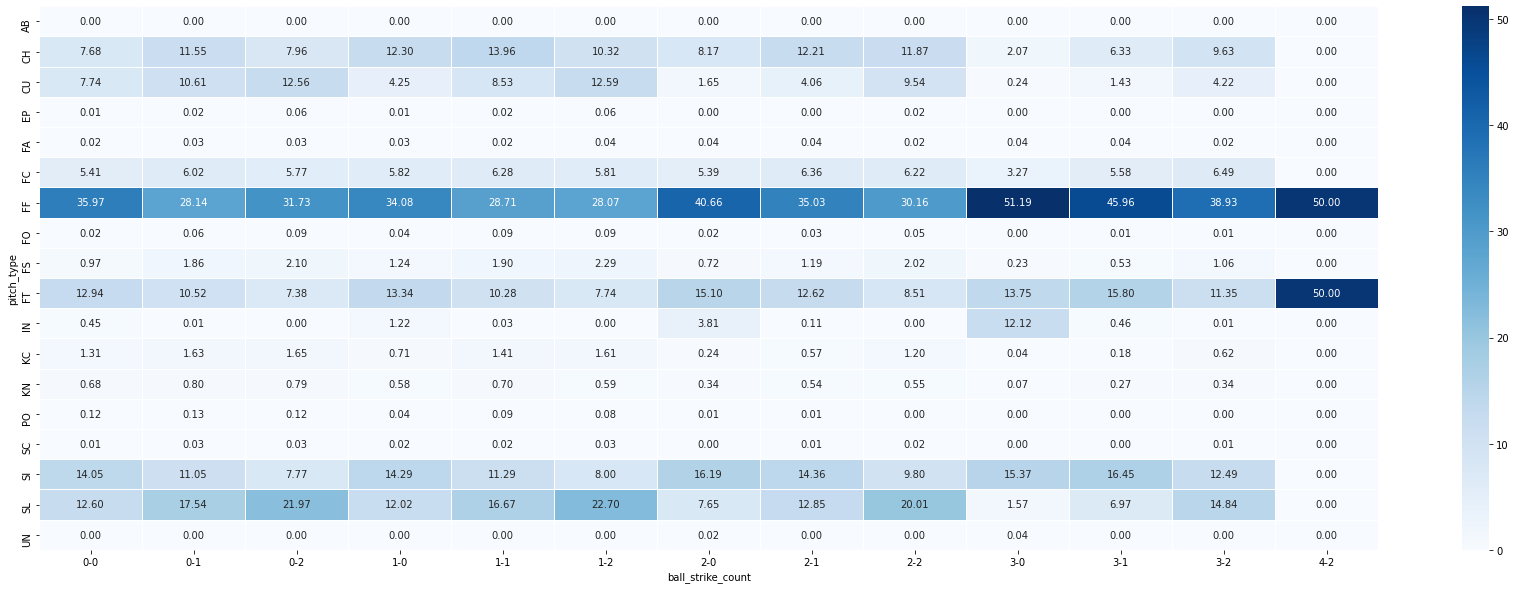

In [228]:
# Transformation of data 
ball_strike = df_non_null.copy()
ball_strike['ball_strike_count'] = ball_strike['balls'].astype('str') + '-' + ball_strike['strikes'].astype('str')
ball_strike_grouping = pd.DataFrame(ball_strike.groupby(['ball_strike_count', 'pitch_type']).agg({'pitch_type':'count'}))
ball_strike_grouping.rename(columns = {'pitch_type':'pitch_type_count'}, inplace = True)
ball_strike_grouping.reset_index(inplace = True)
ball_strike_grouping_table = ball_strike_grouping.pivot(index = 'pitch_type', columns='ball_strike_count', values = 'pitch_type_count')
ball_strike_grouping_table.fillna(0, inplace=True)

# Generating proportions for a heatmap
ball_strike_grouping_table_proportion = ball_strike_grouping_table.copy()
ball_strike_grouping_table_proportion[ball_strike_grouping_table_proportion.columns] = ball_strike_grouping_table_proportion[ball_strike_grouping_table_proportion.columns].div(ball_strike_grouping_table_proportion
                                                                                                  [ball_strike_grouping_table_proportion.columns].sum(axis=0), axis=1).multiply(100)
# Raw data
print(ball_strike_grouping_table)

# Plotting heatmap
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(ball_strike_grouping_table_proportion, annot=True, fmt='.2f', linewidths=.5, ax=ax, cmap='Blues')

ball_strike_count       0-0      0-1      0-2      1-0      1-1      1-2      2-0      2-1      2-2     3-0      3-1      3-2  4-2
pitch_type                                                                                                                        
Breaking_Ball       40725.0  27014.0  15914.0  12962.0  19551.0  24121.0   2547.0   6716.0  17111.0   170.0   1382.0   6532.0  0.0
Changeup            15723.0  11215.0   3871.0   9830.0  10779.0   7164.0   2271.0   4898.0   6912.0   195.0   1062.0   3305.0  0.0
Fastball           130405.0  52230.0  24078.0  52460.0  42932.0  33931.0  20857.0  26740.0  31534.0  7672.0  13581.0  23324.0  2.0
Other                1118.0    185.0     92.0    991.0    160.0    108.0   1030.0     60.0     29.0  1113.0     75.0      4.0  0.0


<AxesSubplot:xlabel='ball_strike_count', ylabel='pitch_type'>

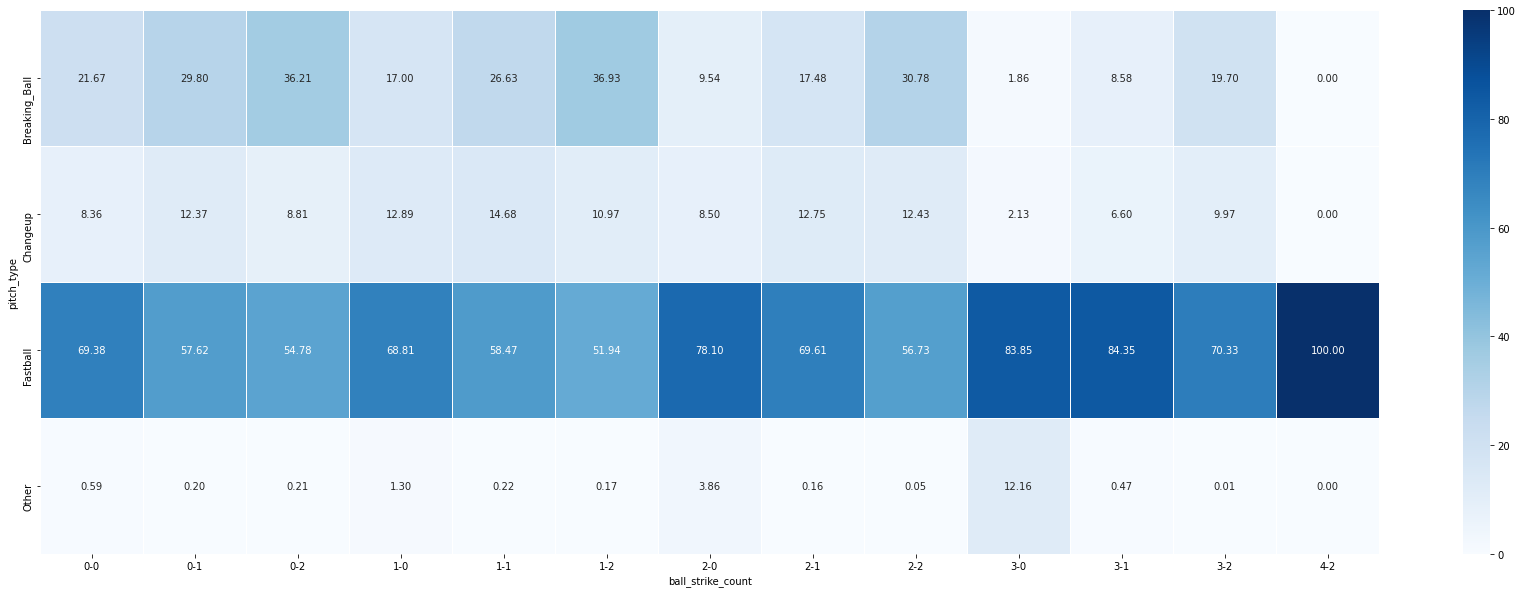

In [229]:
# Transformation of data 
ball_strike_grouped = df_non_null.copy()
ball_strike_grouped['ball_strike_count'] = ball_strike['balls'].astype('str') + '-' + ball_strike['strikes'].astype('str')
ball_strike_grouped['pitch_type'] = ball_strike_grouped['pitch_type'].map(grouped_pitches_list)
ball_strike_grouped = pd.DataFrame(ball_strike_grouped.groupby(['ball_strike_count', 'pitch_type']).agg({'pitch_type':'count'}))
ball_strike_grouped.rename(columns = {'pitch_type':'pitch_type_count'}, inplace = True)
ball_strike_grouped.reset_index(inplace = True)
ball_strike_grouped_table = ball_strike_grouped.pivot(index = 'pitch_type', columns='ball_strike_count', values = 'pitch_type_count')
ball_strike_grouped_table.fillna(0, inplace=True)

# Generating proportions
ball_strike_grouped_table_proportion = ball_strike_grouped_table.copy()
ball_strike_grouped_table_proportion[ball_strike_grouped_table_proportion.columns] = ball_strike_grouped_table_proportion[ball_strike_grouped_table_proportion.columns].div(ball_strike_grouped_table_proportion
                                                                                                    [ball_strike_grouped_table_proportion.columns].sum(axis=0), axis=1).multiply(100)
# Raw data
print(ball_strike_grouped_table)

# Plotting heatmap
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(ball_strike_grouped_table_proportion, annot=True, fmt='.2f', linewidths=.5, ax=ax, cmap='Blues')

### Reflecting on the visuals and tables above, we can generally make the assumptions that fastballs act as a propable option for the next pitch at any given Ball-Strike count. Breaking balls however seems to show a bit more relevance than changeups/other in given situations but then curtain significantly in a 3-0 count. Does this signify pitchers are less confident in these types pitches during this case scenario? 

### Identifying periods in the game that may influence the pitch type 

In [230]:
# Transforming data (identifying non grouped pitch data to identify any changes in any potential patterns)
influenced_pitch = df_non_null.copy()
influenced_pitch['pitch_type'] = influenced_pitch['pitch_type'].map(pitches_list)

# Grouping data by batting count and identifying the most often pitch (mode)
influenced_pitch_grouped = pd.DataFrame(influenced_pitch.groupby('at_bat_num')['pitch_type'].agg(pd.Series.mode)).reset_index()
influenced_pitch_grouped = influenced_pitch_grouped.explode('pitch_type') # There is potential for a duplicate mode, we will use explode to account for this 

average_at_bat_num = pd.DataFrame(influenced_pitch.groupby('game_pk')['at_bat_num'].max()).reset_index()

# The dataframe renders a long output so a snapshot was provided
print('The average batters per game is', round(average_at_bat_num['at_bat_num'].mean(),2), '\n')
print('From game to game, the number of batters can deviate by', round(average_at_bat_num['at_bat_num'].std(),2), 'hitters\n')
print(influenced_pitch_grouped.head(10))
print(influenced_pitch_grouped.tail(10))

The average batters per game is 76.48 

From game to game, the number of batters can deviate by 9.19 hitters

   at_bat_num pitch_type
0           1   Fastball
1           2   Fastball
2           3   Fastball
3           4   Fastball
4           5   Fastball
5           6   Fastball
6           7   Fastball
7           8   Fastball
8           9   Fastball
9          10   Fastball
     at_bat_num         pitch_type
148         149           Changeup
149         150           Changeup
150         151             Sinker
151         152           Fastball
152         153           Fastball
153         154              Other
154         155           Changeup
155         156  Two-Seam Fastball
156         157  Two-Seam Fastball
157         158             Slider


### Pitching types tend to change when the volume of hitters rises but we have to be careful when modeling as this could introduce bias. This may rise questions in the nature of : 'Are closing pitchers prone to defying the expected pitch?', 'Are starting pitchers more predictable than closing pitches?', 'Are the pitches being thrown on tha back end due to overtime and it becomes relevant to try something different?'. These may be interesting questions to answer in a following analysis. 

### Lastly: We are going to identify some conditional probabilites related to an event given a pitch type 

In [257]:
# Generating for crosstab
conditional_pitch_event = df_non_null.copy()
conditional_pitch_event['pitch_type'] = conditional_pitch_event['pitch_type'].map(pitches_list)

# conditional probability is rendered by setting 'normalize="columns"' where P(event | pitch_type)
conditional_pitch_event = round(pd.crosstab(conditional_pitch_event.event, conditional_pitch_event.pitch_type, margins=True, normalize="columns"),3) 
conditional_pitch_event

pitch_type,Changeup,Curveball,Cutter,Eephus,Fastball,Forkball,Four-Seam Fastball,Knuckle-curve,Knuckleball,Other,Screwball,Sinker,Slider,Splitter,Two-Seam Fastball,All
event,,,,,,,,,,,,,,,,
Batter Interference,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Bunt Groundout,0.001,0.001,0.001,0.000,0.001,0.000,0.000,0.001,0.002,0.000,0.000,0.001,0.001,0.000,0.001,0.001
Bunt Lineout,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Bunt Pop Out,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
Catcher Interference,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Double,0.041,0.037,0.037,0.052,0.041,0.058,0.039,0.044,0.046,0.005,0.033,0.042,0.037,0.041,0.041,0.040
Double Play,0.003,0.002,0.002,0.000,0.002,0.003,0.000,0.003,0.000,0.002,0.000,0.003,0.003,0.003,0.002,0.003
Fan interference,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Field Error,0.008,0.009,0.008,0.022,0.007,0.009,0.020,0.007,0.010,0.001,0.008,0.010,0.008,0.010,0.010,0.008


In [258]:
# Generating data for crosstab
conditional_pitch_event_grouped = df_non_null.copy()
conditional_pitch_event_grouped['pitch_type'] = conditional_pitch_event_grouped['pitch_type'].map(grouped_pitches_list)

# conditional probability is rendered by setting 'normalize="columns"' where P(event | pitch_type)
conditional_pitch_event_grouped = round(pd.crosstab(conditional_pitch_event_grouped.event, conditional_pitch_event_grouped.pitch_type, margins=True, normalize="columns"),3)
conditional_pitch_event_grouped

pitch_type,Breaking_Ball,Changeup,Fastball,Other,All
event,,,,,
Batter Interference,0.000,0.000,0.000,0.000,0.000
Bunt Groundout,0.001,0.001,0.001,0.000,0.001
Bunt Lineout,0.000,0.000,0.000,0.000,0.000
Bunt Pop Out,0.000,0.000,0.001,0.000,0.001
Catcher Interference,0.000,0.000,0.000,0.000,0.000
Double,0.037,0.041,0.041,0.008,0.040
Double Play,0.003,0.003,0.003,0.002,0.003
Fan interference,0.000,0.000,0.000,0.000,0.000
Field Error,0.008,0.009,0.008,0.002,0.008
